<a href="https://colab.research.google.com/github/b15145456/colabNN/blob/master/%E9%A1%9E%E7%A5%9E%E7%B6%93%E7%B6%B2%E8%B7%AFHW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#類神經網路HW1



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. 使用train_test_split函數將資料分為測試資料和訓練資料
輸入x與輸出y分離

In [ ]:
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
dataArr = np.loadtxt('./drive/My Drive/DS/2CloseS.txt')
# dataArr = np.loadtxt('./ex.txt')
df = pd.DataFrame(dataArr)
dataShape = df.shape
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:dataShape[1]-1], df.iloc[:,dataShape[1]-1], test_size=0.25)
y_unique = y_train.unique()
y_unique.sort()
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_unique)


(150, 2)
(50, 2)
(150,)
(50,)
[1. 2.]


2. 設定Hyperparameter鍵結值=**W**, 設定learning rate=**R**

##定義2維類神經網路邏輯

In [ ]:
def threshold(res):
    if res>0:
      return y_unique[1]     #設定區間值
    else:
      return y_unique[0]

def neuralNetworkTrain(train_x, train_y, r, dataNum, expectAcuRate = 0.8, iterateTimes = 10000):  #設定收斂條件(精準度0.8, 跌代次數1000)
  w = np.array([-1, random.random(), random.random()])  #在最前面插入-1
  # w = np.array([-1, 0, 1])  #在最前面插入-1

  x = np.array((X_train.sample(n=1, axis=0)))
  x = np.insert(x, 0, -1.)    #在最前面插入-1
  accT = 0
  accTotal = 0
  # case1=0
  # case2=0
  while(True):
    for i in range(dataNum):
      x = np.array((X_train.iloc[i,:]))
      x = np.insert(x, 0, -1., axis=0)
      predict_y = w.dot(x.T)
      # print(i)
      # print(x)
      # print(w)
      # print(predict_y)
      predict_y_res = threshold(predict_y)
      if train_y.iloc[i] != predict_y_res and predict_y<0:      #Case1
        # print('case1')
        w = w + r*x
        # case1+=1
      if train_y.iloc[i] != predict_y_res and predict_y>=0:      #Case2
        # print('case2')
        # case2+=1
        w = w - r*x
      if (int)(train_y.iloc[i]) == predict_y_res:
          accT += 1
          accTotal += 1
      else:
          accTotal += 1
      
      acuRate = accT/accTotal
      iterateTimes -= 1
      if (i>100 and acuRate>expectAcuRate) or iterateTimes==0:
        return w, acuRate

In [ ]:
R = 10
train_W, acuRate = neuralNetworkTrain(X_train, y_train, R, X_train.shape[0], 0.7, 10000)
print(train_W)
print(acuRate)


[ -1.         -17.6378796    0.82710331]
0.9607843137254902


## 訓練資料視覺化

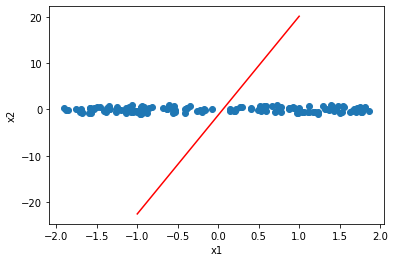

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

x = np.linspace(-1,1,5)
# print(-1*train_W[0])
y = (train_W[0]-x*train_W[1])/train_W[2]
ax.plot(x,y,'r-')

ax.scatter(X_train.iloc[:,0],X_train.iloc[:,1])
ax.set_xlabel("x1")
ax.set_ylabel("x2")
plt.show()

##測試資料

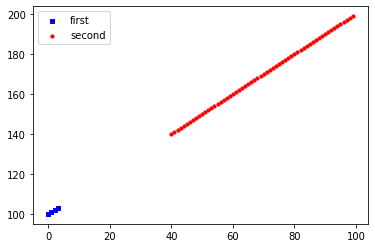

In [ ]:
import matplotlib.pyplot as plt

x = range(100)
y = range(100,200)
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x[:4], y[:4], s=10, c='b', marker="s", label='first')
ax1.scatter(x[40:],y[40:], s=10, c='r', marker="o", label='second')
plt.legend(loc='upper left');
plt.show()